ali535_NNHonly

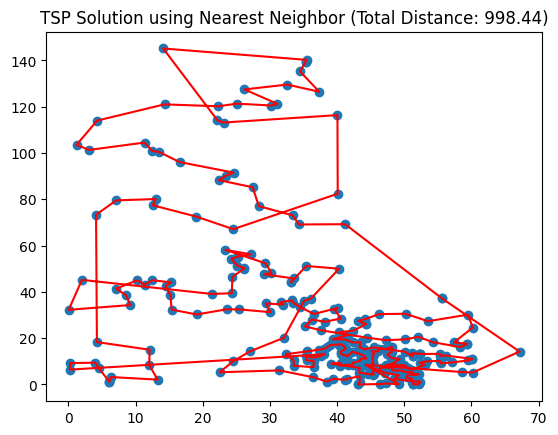

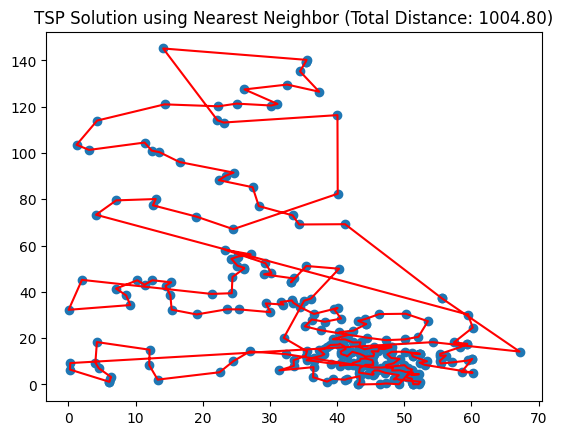

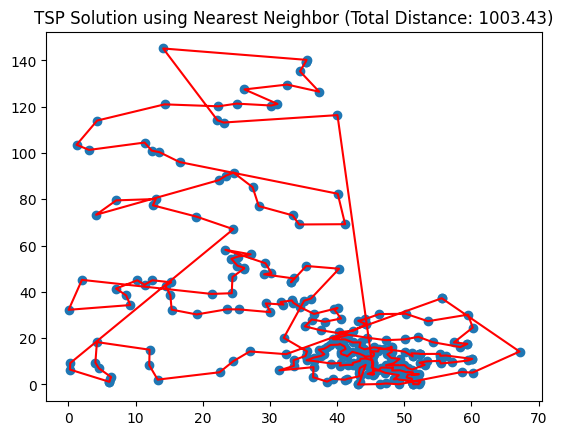

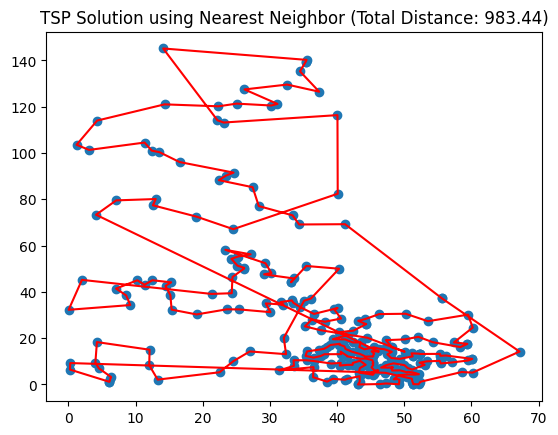

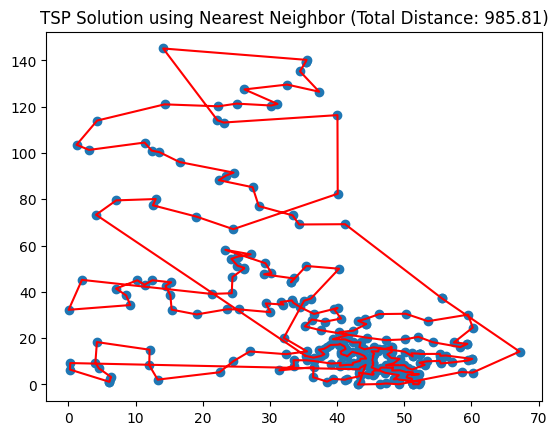

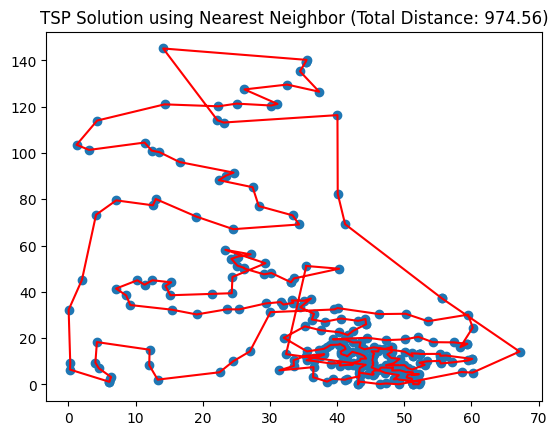

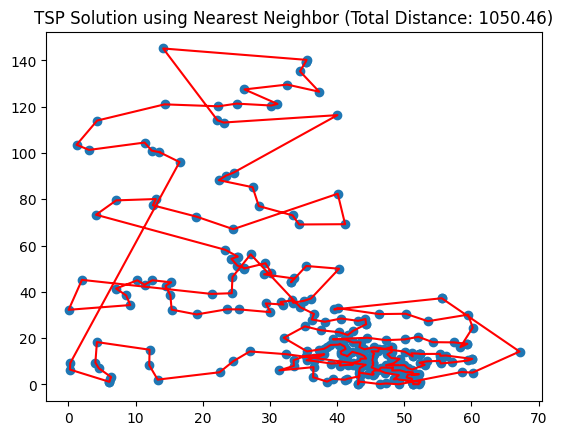

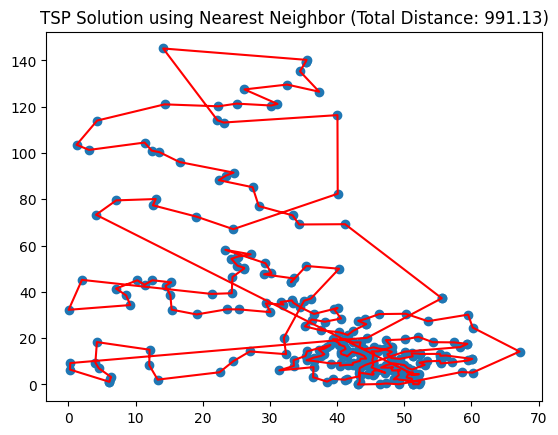

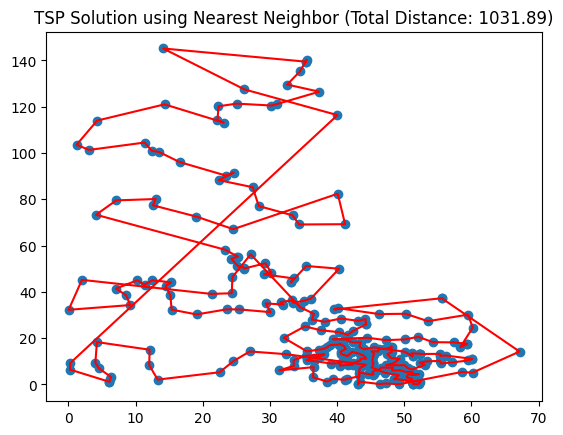

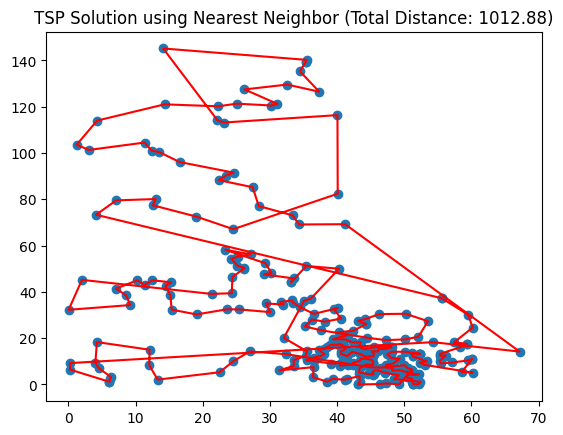

Average Tour Length: 1003.6847136786012


In [ ]:
import re
import numpy as np
import matplotlib.pyplot as plt

class TSPSolver:
    def __init__(self, points):
        self.points = np.array(points)
        self.n = len(points)
        self.tour = None

    def nearest_neighbor(self, start=None):
        if start is None:
            start = np.random.randint(0, self.n)
        unvisited = set(range(self.n))
        unvisited.remove(start)
        tour = [start]

        while unvisited:
            current_city = tour[-1]
            nearest_city = min(unvisited, key=lambda city: np.linalg.norm(self.points[current_city] - self.points[city]))
            tour.append(nearest_city)
            unvisited.remove(nearest_city)

        self.tour = tour

    def total_distance(self, tour=None):
        if tour is None:
            tour = self.tour
        return sum(np.linalg.norm(self.points[tour[i]] - self.points[tour[i + 1]]) for i in range(self.n - 1))

    def solve(self):
        self.nearest_neighbor()
        # Connect the last city back to the starting city to form a closed tour
        self.tour.append(self.tour[0])

# Parse the TSP dataset and extract coordinates
def parse_tsp_dataset(data):
    coordinates = []
    pattern = re.compile(r'\s*(\d+)\s+(\d+\.\d+)\s+(\d+\.\d+)')  # Updated regular expression

    in_node_coord_section = False
    for line in data.split('\n'):
        if line.startswith("NODE_COORD_SECTION"):
            in_node_coord_section = True
            continue
        if line.startswith("EOF"):
            break
        if in_node_coord_section:
            match = pattern.match(line)
            if match:
                coordinates.append((float(match.group(2)), float(match.group(3))))

    return coordinates


# Load the TSP dataset from a file
def load_tsp_file(file_path):
    with open(file_path, 'r') as file:
        tsp_data = file.read()
    return tsp_data

# Specify the path to your TSP file
tsp_file_path = "ali535.tsp"

# Load the TSP dataset from the file
tsp_data = load_tsp_file(tsp_file_path)

# Parse the dataset and extract coordinates
city_coordinates = parse_tsp_dataset(tsp_data)

# Create TSPSolver instance and solve using nearest neighbor
total_distances = []
for i in range(10):
    solver = TSPSolver(city_coordinates)
    solver.solve()
    total_distance = solver.total_distance()
    total_distances.append(total_distance)
    # Plot the solution
    plt.figure()
    plt.scatter(solver.points[:, 0], solver.points[:, 1])
    tour_points = np.array([solver.points[i] for i in solver.tour])
    plt.plot(tour_points[:, 0], tour_points[:, 1], 'r-')
    plt.title(f'TSP Solution using Nearest Neighbor (Total Distance: {total_distance:.2f})')
    plt.show()

# Calculate average tour length
average_tour_length = np.mean(total_distances)
print("Average Tour Length:", average_tour_length)


ali535_NNHwith2OPT

Iteration 11523: Improved total distance to 999.20
Iteration 11932: Improved total distance to 998.26
Iteration 18541: Improved total distance to 997.52
Iteration 21940: Improved total distance to 997.13
Iteration 23604: Improved total distance to 995.88
Iteration 25000: Improved total distance to 994.34
Iteration 27315: Improved total distance to 991.31
Iteration 27329: Improved total distance to 989.77
Iteration 34644: Improved total distance to 989.33
Iteration 35865: Improved total distance to 988.17
Iteration 36141: Improved total distance to 987.60
Iteration 36144: Improved total distance to 980.85
Iteration 36670: Improved total distance to 979.09
Iteration 37047: Improved total distance to 978.14
Iteration 59031: Improved total distance to 974.22
Iteration 59733: Improved total distance to 967.91
Iteration 65874: Improved total distance to 966.79
Iteration 73082: Improved total distance to 966.20
Iteration 83567: Improved total distance to 964.91
Iteration 88594: Improved total

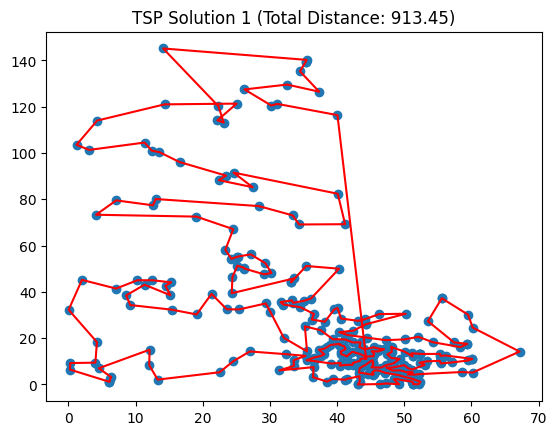

Iteration 9109: Improved total distance to 977.24
Iteration 12857: Improved total distance to 976.41
Iteration 19174: Improved total distance to 976.18
Iteration 22781: Improved total distance to 976.00
Iteration 27260: Improved total distance to 975.25
Iteration 32423: Improved total distance to 974.39
Iteration 33338: Improved total distance to 974.30
Iteration 33972: Improved total distance to 974.08
Iteration 36928: Improved total distance to 973.14
Iteration 37054: Improved total distance to 972.73
Iteration 46058: Improved total distance to 969.62
Iteration 46061: Improved total distance to 964.91
Iteration 46064: Improved total distance to 960.74
Iteration 57381: Improved total distance to 960.69
Iteration 58175: Improved total distance to 958.89
Iteration 71555: Improved total distance to 957.52
Iteration 72716: Improved total distance to 957.52
Iteration 73688: Improved total distance to 951.45
Iteration 87075: Improved total distance to 949.38
Iteration 88814: Improved total 

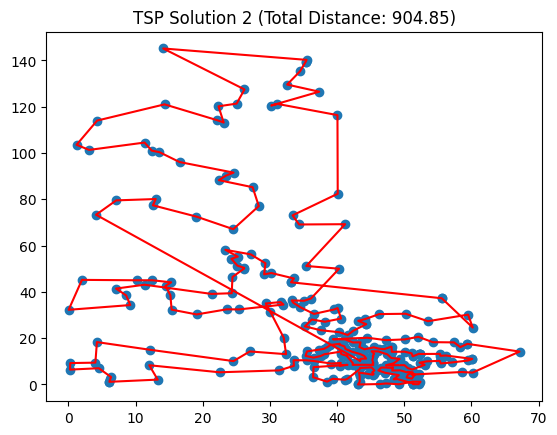

Iteration 4233: Improved total distance to 959.05
Iteration 11024: Improved total distance to 959.02
Iteration 13893: Improved total distance to 958.97
Iteration 28353: Improved total distance to 958.79
Iteration 35527: Improved total distance to 958.73
Iteration 50987: Improved total distance to 957.49
Iteration 51037: Improved total distance to 956.56
Iteration 51861: Improved total distance to 956.56
Iteration 52072: Improved total distance to 956.05
Iteration 53340: Improved total distance to 955.56
Iteration 58691: Improved total distance to 952.26
Iteration 64553: Improved total distance to 946.19
Iteration 69306: Improved total distance to 943.62
Iteration 72271: Improved total distance to 942.33
Iteration 79164: Improved total distance to 942.10
Iteration 82943: Improved total distance to 940.90
Iteration 85741: Improved total distance to 939.95
Iteration 97522: Improved total distance to 938.90
Iteration 106823: Improved total distance to 938.88
Iteration 109492: Improved tota

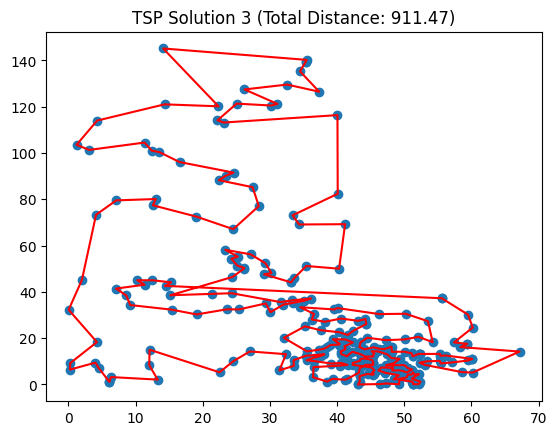

Average Tour Length: 909.9227485812245


In [ ]:
import re
import numpy as np
import matplotlib.pyplot as plt
import random

class TSPSolver:
    def __init__(self, points):
        self.points = np.array(points)
        self.n = len(points)
        self.tour = None

    def nearest_neighbor(self, start=None):
        if start is None:
            start = np.random.randint(0, self.n)
        unvisited = set(range(self.n))
        unvisited.remove(start)
        tour = [start]

        while unvisited:
            current_city = tour[-1]
            nearest_city = min(unvisited, key=lambda city: np.linalg.norm(self.points[current_city] - self.points[city]))
            tour.append(nearest_city)
            unvisited.remove(nearest_city)

        self.tour = tour

    def total_distance(self, tour=None):
        if tour is None:
            tour = self.tour
        return sum(np.linalg.norm(self.points[tour[i]] - self.points[tour[i + 1]]) for i in range(self.n - 1))

    def two_opt_swap(self, tour, i, k):
        new_tour = tour[:i] + tour[i:k + 1][::-1] + tour[k + 1:]
        return new_tour

    def two_opt(self, tour=None):
        if tour is None:
            tour = self.tour

        improvement = True
        iteration = 0
        while improvement:
            improvement = False
            for i in range(1, self.n - 2):
                for k in range(i + 1, self.n):
                    iteration += 1
                    if random.random() < 0.1:  # Adjust this probability as needed
                        new_tour = self.two_opt_swap(tour, i, k)
                        if self.total_distance(new_tour) < self.total_distance(tour):
                            tour = new_tour
                            improvement = True
                            print(f"Iteration {iteration}: Improved total distance to {self.total_distance(tour):.2f}")

        self.tour = tour

    def solve(self):
        self.nearest_neighbor()
        self.two_opt()
        # Connect the last city back to the starting city to form a closed tour
        self.tour.append(self.tour[0])

# Parse the TSP dataset and extract coordinates
def parse_tsp_dataset(data):
    coordinates = []
    pattern = re.compile(r'\s*(\d+)\s+(\d+\.\d+)\s+(\d+\.\d+)')  # Updated regular expression

    in_node_coord_section = False
    for line in data.split('\n'):
        if line.startswith("NODE_COORD_SECTION"):
            in_node_coord_section = True
            continue
        if line.startswith("EOF"):
            break
        if in_node_coord_section:
            match = pattern.match(line)
            if match:
                coordinates.append((float(match.group(2)), float(match.group(3))))

    return coordinates

# Load the TSP dataset from a file
def load_tsp_file(file_path):
    with open(file_path, 'r') as file:
        tsp_data = file.read()
    return tsp_data

# Specify the path to your TSP file
tsp_file_path = "ali535.tsp"

# Load the TSP dataset from the file
tsp_data = load_tsp_file(tsp_file_path)

# Parse the dataset and extract coordinates
city_coordinates = parse_tsp_dataset(tsp_data)

# Store total distances
total_distances = []

# Rerun TSP solving process 3 times
for i in range(3):
    # Create TSPSolver instance and solve
    solver = TSPSolver(city_coordinates)
    solver.solve()

    # Calculate total distance and add to list
    total_distance = solver.total_distance()
    total_distances.append(total_distance)

    # Plot the solution
    plt.figure()
    plt.scatter(solver.points[:, 0], solver.points[:, 1])
    tour_points = np.array([solver.points[i] for i in solver.tour])
    plt.plot(tour_points[:, 0], tour_points[:, 1], 'r-')
    plt.title(f'TSP Solution {i+1} (Total Distance: {total_distance:.2f})')
    plt.show()

# Calculate and print average tour length
average_tour_length = np.mean(total_distances)
print("Average Tour Length:", average_tour_length)


ali535_NNHwith3OPT

In [ ]:
import re
import numpy as np
import matplotlib.pyplot as plt
import random

class TSPSolver:
    def __init__(self, points):
        self.points = np.array(points)
        self.n = len(points)
        self.tour = None

    def nearest_neighbor(self, start=None):
        if start is None:
            start = np.random.randint(0, self.n)
        unvisited = set(range(self.n))
        unvisited.remove(start)
        tour = [start]

        while unvisited:
            current_city = tour[-1]
            nearest_city = min(unvisited, key=lambda city: np.linalg.norm(self.points[current_city] - self.points[city]))
            tour.append(nearest_city)
            unvisited.remove(nearest_city)

        self.tour = tour

    def total_distance(self, tour=None):
        if tour is None:
            tour = self.tour
        return sum(np.linalg.norm(self.points[tour[i]] - self.points[tour[i + 1]]) for i in range(self.n - 1))

    def three_opt_swap(self, tour, i, j, k):
        new_tour = tour[:i] + tour[j:k+1][::-1] + tour[i:j] + tour[k+1:]
        return new_tour

    def three_opt(self, tour=None):
        if tour is None:
            tour = self.tour

        improvement = True
        iteration = 0
        while improvement:
            improvement = False
            for i in range(self.n - 4):
                for j in range(i + 2, self.n - 2):
                    for k in range(j + 2, self.n):
                        iteration += 1
                        if random.random() < 0.1:  # Adjust this probability as needed
                            new_tour = self.three_opt_swap(tour, i, j, k)
                            if self.total_distance(new_tour) < self.total_distance(tour):
                                tour = new_tour
                                improvement = True
                                print(f"Iteration {iteration}: Improved total distance to {self.total_distance(tour):.2f}")

        self.tour = tour

    def solve(self):
        self.nearest_neighbor()
        self.three_opt()
        # Connect the last city back to the starting city to form a closed tour
        self.tour.append(self.tour[0])

def parse_tsp_dataset(data):
    coordinates = []
    pattern = re.compile(r'\s*(\d+)\s+(\d+\.\d+)\s+(\d+\.\d+)')  # Updated regular expression

    in_node_coord_section = False
    for line in data.split('\n'):
        if line.startswith("NODE_COORD_SECTION"):
            in_node_coord_section = True
            continue
        if line.startswith("EOF"):
            break
        if in_node_coord_section:
            match = pattern.match(line)
            if match:
                coordinates.append((float(match.group(2)), float(match.group(3))))

    return coordinates

# Load the TSP dataset from a file
def load_tsp_file(file_path):
    with open(file_path, 'r') as file:
        tsp_data = file.read()
    return tsp_data

# Specify the path to your TSP file
tsp_file_path = "ali535.tsp"

# Load the TSP dataset from the file
tsp_data = load_tsp_file(tsp_file_path)

# Parse the dataset and extract coordinates
city_coordinates = parse_tsp_dataset(tsp_data)

# Store total distances for three runs
total_distances = []

# Run the solver two times
for _ in range(2):
    solver = TSPSolver(city_coordinates)
    solver.solve()
    total_distance = solver.total_distance()
    total_distances.append(total_distance)

    # Plot the solution for each run
    plt.scatter(solver.points[:, 0], solver.points[:, 1])
    tour_points = np.array([solver.points[i] for i in solver.tour])
    plt.plot(tour_points[:, 0], tour_points[:, 1], 'r-')
    plt.title(f'TSP Solution using Nearest Neighbor with 3-opt (Total Distance: {total_distance:.2f})')
    plt.show()

# Calculate and print the average total distance
average_distance = sum(total_distances) / len(total_distances)
print(f"Average Tour Length: {average_distance:.2f}")